## The challenge:

In this competition you’ll predict what types of trees there are in an area based on various geographic features.

The competition datasets comes from a study conducted in four wilderness areas within the beautiful Roosevelt National Forest of northern Colorado. These areas represent forests with very little human disturbances – the existing forest cover types there are more a result of ecological processes rather than forest management practices.

The data is in raw form and contains categorical data such as wilderness areas and soil type.

## Import Packages

In [9]:
DATA_DIR = '/kaggle/input/learn-together'
DATA_DIR = 'data'

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train.csv
data/test.csv
data/sample_submission.csv
data/sample_submission.csv.zip
data/input
data/test.csv.zip
data/train.csv.zip


## Load Dataset

In [11]:
train_df=pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df=pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
print("shape training csv: %s" % str(train_df.shape)) 
print("shape test csv: %s" % str(test_df.shape)) 

### Feature types

In [7]:
print(train_df.dtypes.value_counts())
print(test_df.dtypes.value_counts())

int64    56
dtype: int64
int64    55
dtype: int64


In [8]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## NaN
Let's see how many NaN we have in our datasets


In [9]:
train_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [10]:
test_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


### Percentage of Negative value in `Vertical_Distance_To_Hydrology`

In [11]:
print("percent of negative values (training): " + '%.3f' % ((train_df.loc[train_df['Vertical_Distance_To_Hydrology'] < 0].shape[0] / train_df.shape[0])*100))
print("percent of negative values (testing): " + '%.3f' % ((test_df.loc[test_df['Vertical_Distance_To_Hydrology'] < 0].shape[0]/ test_df.shape[0])*100))

percent of negative values (training): 7.533
percent of negative values (testing): 9.543


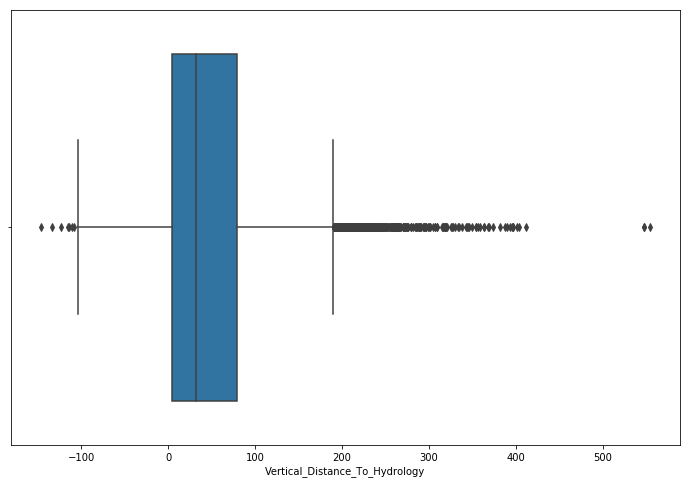

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(train_df['Vertical_Distance_To_Hydrology'])
plt.show()

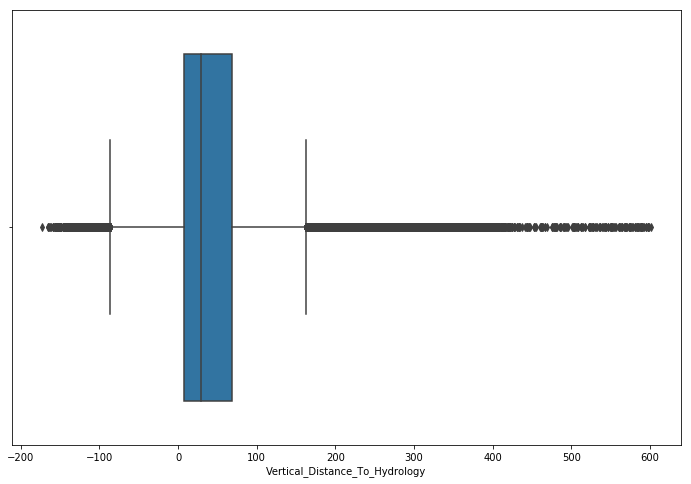

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(test_df['Vertical_Distance_To_Hydrology'])
plt.show()

## Number of examples of each class and overall features

In [14]:
train_df['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [15]:
train_df.shape

(15120, 56)

## Delete Ids
**Let's delete the Id column in the training set but store it for the test set before deleting**

In [16]:
train_df = train_df.drop(["Id"], axis = 1)

test_ids = test_df["Id"]
test_df = test_df.drop(["Id"], axis = 1)

## Basic EDA

In [17]:
column_set = set(train_df.columns) - set(['Cover_Type'])
numerical = set([column for column in column_set if 'Soil' not in column and 'Wilderness' not in column])
categorical = (column_set - numerical)


In [18]:
categorical_df = train_df[categorical] 
categorical_df.head()

,Soil_Type8,Soil_Type19,Soil_Type22,Soil_Type29,Soil_Type15,Soil_Type10,Soil_Type21,Soil_Type20,Soil_Type39,Wilderness_Area2,...,Soil_Type18,Soil_Type23,Soil_Type31,Soil_Type34,Soil_Type35,Soil_Type11,Soil_Type12,Soil_Type3,Soil_Type28,Soil_Type4
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
soil_columns = set([column for column in train_df.columns if 'Soil' in column])
wilderness_colums = set([column for column in train_df.columns if 'Wilderness' in column])

In [20]:
for column in soil_columns:
    train_frequency = train_df[column].sum() / len(train_df)
    test_frequency = test_df[column].sum() / len(test_df)
    print('{} \t{:0.2f} \t{:0.2f}'.format(column, train_frequency, test_frequency))

Soil_Type8 	0.00 	0.00
Soil_Type19 	0.00 	0.01
Soil_Type22 	0.02 	0.06
Soil_Type29 	0.09 	0.20
Soil_Type15 	0.00 	0.00
Soil_Type10 	0.14 	0.05
Soil_Type21 	0.00 	0.00
Soil_Type20 	0.01 	0.02
Soil_Type39 	0.04 	0.02
Soil_Type5 	0.01 	0.00
Soil_Type1 	0.02 	0.00
Soil_Type27 	0.00 	0.00
Soil_Type24 	0.02 	0.04
Soil_Type13 	0.03 	0.03
Soil_Type32 	0.05 	0.09
Soil_Type37 	0.00 	0.00
Soil_Type16 	0.01 	0.00
Soil_Type30 	0.05 	0.05
Soil_Type40 	0.03 	0.01
Soil_Type7 	0.00 	0.00
Soil_Type36 	0.00 	0.00
Soil_Type9 	0.00 	0.00
Soil_Type2 	0.04 	0.01
Soil_Type25 	0.00 	0.00
Soil_Type6 	0.04 	0.01
Soil_Type26 	0.00 	0.00
Soil_Type33 	0.04 	0.08
Soil_Type38 	0.05 	0.03
Soil_Type14 	0.01 	0.00
Soil_Type17 	0.04 	0.00
Soil_Type18 	0.00 	0.00
Soil_Type23 	0.05 	0.10
Soil_Type31 	0.02 	0.04
Soil_Type34 	0.00 	0.00
Soil_Type35 	0.01 	0.00
Soil_Type11 	0.03 	0.02
Soil_Type12 	0.02 	0.05
Soil_Type3 	0.06 	0.01
Soil_Type28 	0.00 	0.00
Soil_Type4 	0.06 	0.02


In [21]:
for column in wilderness_colums:
    train_frequency = train_df[column].sum() / len(train_df)
    test_frequency = test_df[column].sum() / len(test_df)
    print('{} \t{:0.2f} \t{:0.2f}'.format(column, train_frequency, test_frequency))

Wilderness_Area2 	0.03 	0.05
Wilderness_Area1 	0.24 	0.45
Wilderness_Area3 	0.42 	0.44
Wilderness_Area4 	0.31 	0.06


In [22]:
numerical_df = train_df[numerical]
print(numerical_df.shape)
numerical_df.describe()

(15120, 10)


,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways,Hillshade_3pm,Hillshade_Noon,Aspect,Vertical_Distance_To_Hydrology,Hillshade_9am,Horizontal_Distance_To_Hydrology,Slope,Elevation
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,1511.147288,1714.023214,135.091997,218.965608,156.676653,51.076521,212.704299,227.195701,16.501587,2749.322553
std,1099.936493,1325.066358,45.895189,22.801966,110.085801,61.239406,30.561287,210.075296,8.453927,417.678187
min,0.000000,0.000000,0.000000,99.000000,0.000000,-146.000000,0.000000,0.000000,0.000000,1863.000000
25%,730.000000,764.000000,106.000000,207.000000,65.000000,5.000000,196.000000,67.000000,10.000000,2376.000000
50%,1256.000000,1316.000000,138.000000,223.000000,126.000000,32.000000,220.000000,180.000000,15.000000,2752.000000
75%,1988.250000,2270.000000,167.000000,235.000000,261.000000,79.000000,235.000000,330.000000,22.000000,3104.000000
max,6993.000000,6890.000000,248.000000,254.000000,360.000000,554.000000,254.000000,1343.000000,52.000000,3849.000000


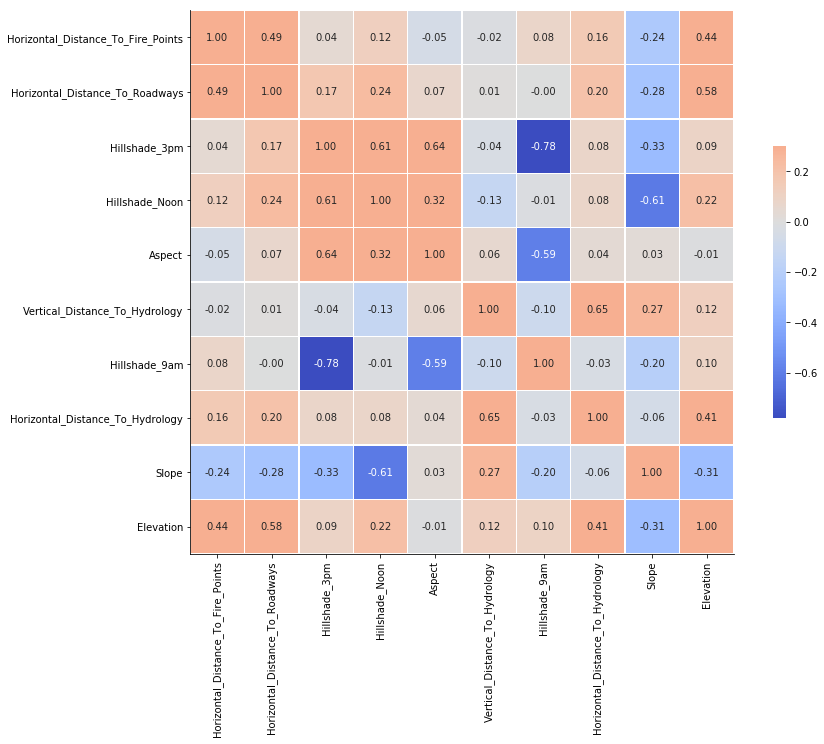

In [23]:
corr = numerical_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

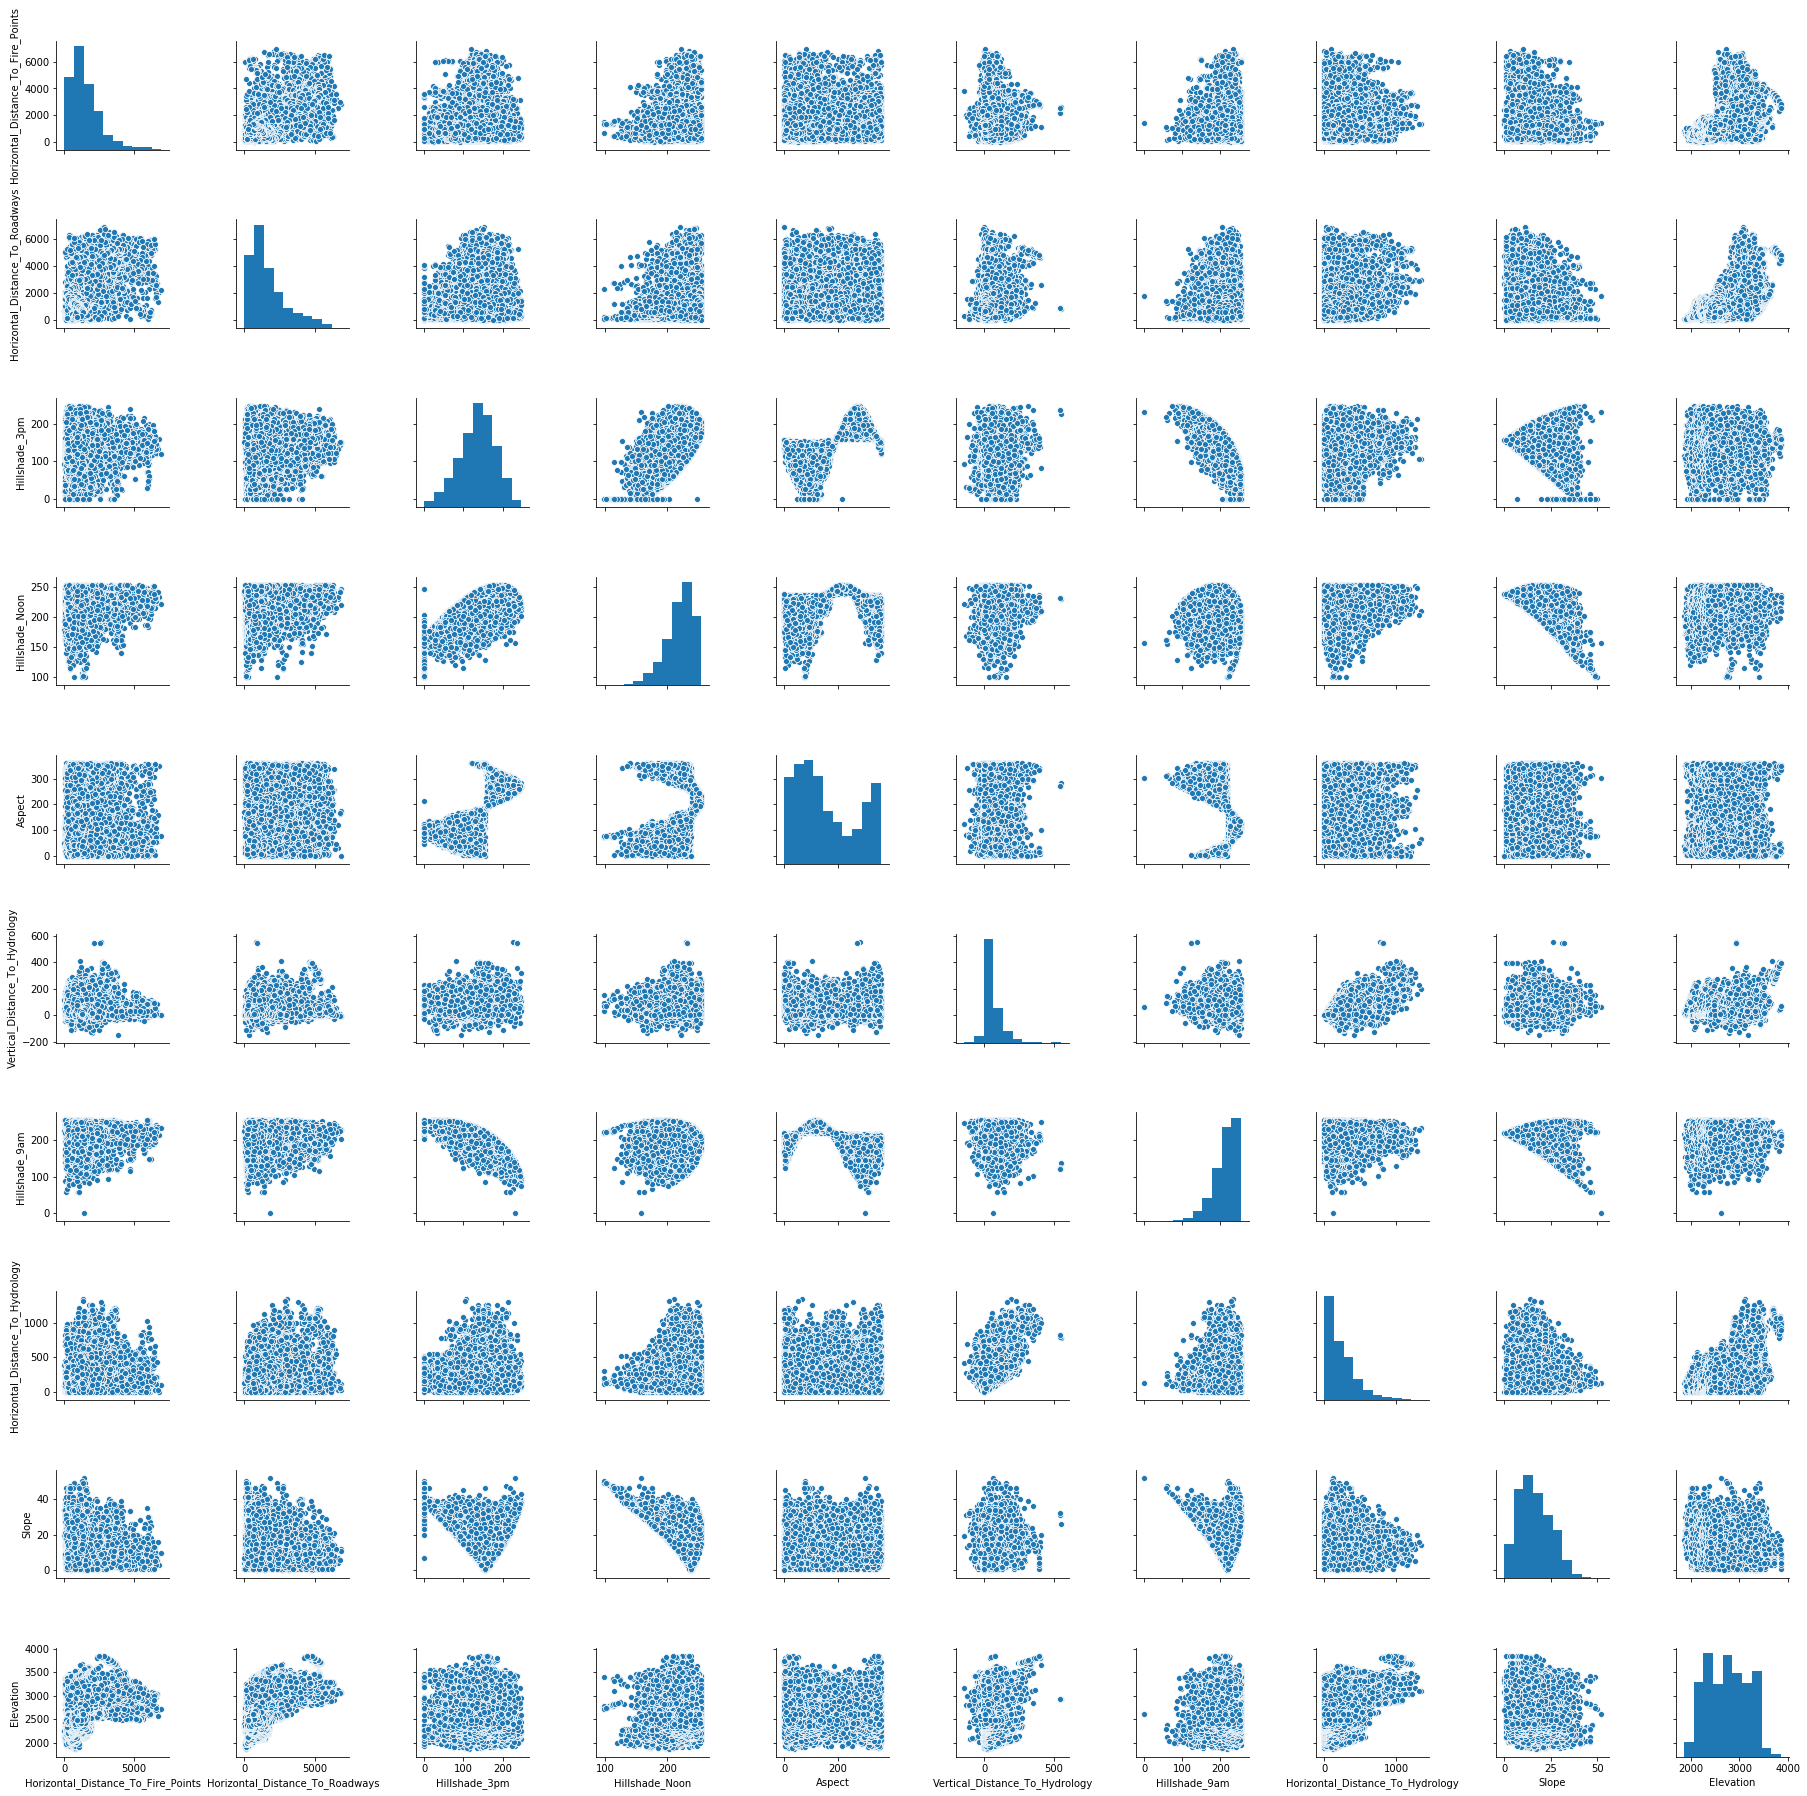

In [24]:
 sns.pairplot(numerical_df)

### What type of forest are "under water"

In [25]:
print((train_df['Vertical_Distance_To_Hydrology'] < 0).sum() / len(train_df))
print((test_df['Vertical_Distance_To_Hydrology'] < 0).sum() / len(test_df))

0.07533068783068783
0.09543163713217363


In [26]:
train_df[train_df['Vertical_Distance_To_Hydrology'] < 0]['Cover_Type'].value_counts()

1    241
7    200
5    200
2    186
6    144
3    117
4     51
Name: Cover_Type, dtype: int64

In [27]:
train_df[train_df['Vertical_Distance_To_Hydrology'] <= 0]['Cover_Type'].value_counts()

4    973
1    418
5    403
6    370
7    355
2    313
3    197
Name: Cover_Type, dtype: int64

In [28]:
train_df[train_df['Vertical_Distance_To_Hydrology'] > 0]['Cover_Type'].value_counts()

3    1963
2    1847
7    1805
6    1790
5    1757
1    1742
4    1187
Name: Cover_Type, dtype: int64

## Eliminate some categorical 


In [29]:
wilderness_selected = []
for column in wilderness_colums:
    train_frequency = train_df[column].sum() / len(train_df)
    test_frequency = test_df[column].sum() / len(test_df)
    if train_frequency > 0.04 and test_frequency > 0.04 \
        and abs(train_frequency - test_frequency) / abs(train_frequency + test_frequency) < .5:
        wilderness_selected.append(column)
        print(abs(train_frequency - test_frequency) / abs(train_frequency + test_frequency))
        print('{} \t{:0.2f} \t{:0.2f}'.format(column, train_frequency, test_frequency))

0.31283288050519475
Wilderness_Area1 	0.24 	0.45
0.01938100620819061
Wilderness_Area3 	0.42 	0.44


In [31]:
soil_selected = []
for column in soil_columns:
    train_frequency = train_df[column].sum() / len(train_df)
    test_frequency = test_df[column].sum() / len(test_df)
    if train_frequency > 0.04 and test_frequency > 0.04 \
        and abs(train_frequency - test_frequency) / abs(train_frequency + test_frequency) < .5:
        soil_selected.append(column)
        print(abs(train_frequency - test_frequency) / abs(train_frequency + test_frequency))
        print('{} \t{:0.2f} \t{:0.2f}'.format(column, train_frequency, test_frequency))

0.40448961329951316
Soil_Type29 	0.09 	0.20
0.4489067266381328
Soil_Type10 	0.14 	0.05
0.33487975112866664
Soil_Type32 	0.05 	0.09
0.04083870565779381
Soil_Type30 	0.05 	0.05
0.3178315132126601
Soil_Type33 	0.04 	0.08
0.33591904443855525
Soil_Type23 	0.05 	0.10


## Model Training

Let's use 80% of the Data for training, and 20% for validation. We'll then train a simple Random Forest Classifier with 100 trees


In [32]:
X_train, X_val, y_train, y_val = train_test_split(train_df.drop(['Cover_Type'], axis=1), train_df['Cover_Type'], test_size=0.2)

In [33]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12096, 54), (3024, 54), (12096,), (3024,))

In [34]:
model = RandomForestClassifier(n_estimators=600, oob_score=True)
model.fit(X_train, y_train)
model.oob_score_

0.861441798941799

In [35]:
model.score(X_train, y_train)

1.0

In [36]:
predictions = model.predict(X_val)
accuracy_score(y_val, predictions)

0.8581349206349206

### Same model, selected columns

In [37]:
X_train_reduced = X_train[[*numerical, *wilderness_selected, *soil_selected]]
X_val_reduced = X_val[[*numerical, *wilderness_selected, *soil_selected]]

In [38]:
model.fit(X_train_reduced, y_train)
model.oob_score_

0.8580522486772487

In [39]:
model.score(X_train_reduced, y_train)

1.0

In [40]:
predictions = model.predict(X_val_reduced)
accuracy_score(y_val, predictions)

0.8521825396825397

Our Model has a 100% accuracy on the training set and 86% on the test set. A clear example of overfitting. 

## Cross grid with all data

In [14]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [42]:
models = [AdaBoostClassifier(), GradientBoostingClassifier(), 
          RandomForestClassifier(), ExtraTreesClassifier(),
          LogisticRegression(), DecisionTreeClassifier()]

In [43]:
for model in models:
    model.fit(X_train, y_train)
    print(model.__class__.__name__)
    print(model.score(X_train, y_train))
    predictions = model.predict(X_val)
    print(accuracy_score(y_val, predictions))
    print(f1_score(y_val, predictions, average='micro'))
    print(f1_score(y_val, predictions, average='weighted'))
    

AdaBoostClassifier
0.2990244708994709
0.28703703703703703
0.28703703703703703
0.22751937733480151
GradientBoostingClassifier
0.8470568783068783
0.7883597883597884
0.7883597883597884
0.784059951904499
RandomForestClassifier
0.9957837301587301
0.8306878306878307
0.8306878306878307
0.829361130838137
ExtraTreesClassifier
1.0
0.8323412698412699
0.8323412698412699
0.8307185172376909
LogisticRegression
0.6708002645502645
0.6593915343915344
0.6593915343915344
0.6552930904643023
DecisionTreeClassifier
1.0
0.7876984126984127
0.7876984126984127
0.7864391956834357


In [44]:
## Reduced data

for model in models:
    model.fit(X_train_reduced, y_train)
    print(model.__class__.__name__)
    print(model.score(X_train_reduced, y_train))
    predictions = model.predict(X_val_reduced)
    print(accuracy_score(y_val, predictions))
    print(f1_score(y_val, predictions, average='micro'))
    print(f1_score(y_val, predictions, average='weighted'))


AdaBoostClassifier
0.3992228835978836
0.38591269841269843
0.38591269841269843
0.28563993018825556
GradientBoostingClassifier
0.8344080687830688
0.7728174603174603
0.7728174603174603
0.767828361108251
RandomForestClassifier
0.9939649470899471
0.8220899470899471
0.8220899470899472
0.8201913837166914
ExtraTreesClassifier
1.0
0.8293650793650794
0.8293650793650794
0.8274489768532264
LogisticRegression
0.6310350529100529
0.6197089947089947
0.6197089947089947
0.6040766128995829
DecisionTreeClassifier
1.0
0.7668650793650794
0.7668650793650794
0.7656393084403571


## Scale Data

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df = numerical_df
scaled_features = scaler.fit_transform(new_df)

In [46]:
scaled_df = pd.DataFrame(scaled_features,
                          index=new_df.index, columns=new_df.columns)

In [47]:
scaled_df.head()

,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways,Hillshade_3pm,Hillshade_Noon,Aspect,Vertical_Distance_To_Hydrology,Hillshade_9am,Horizontal_Distance_To_Hydrology,Slope,Elevation
0,4.334805,-0.908681,0.281259,0.571653,-0.959980,-0.834074,0.271454,0.146639,-1.597132,-0.367095
1,4.285710,-0.999246,0.346627,0.703225,-0.914559,-0.932054,0.238732,-0.072337,-1.715424,-0.381461
2,4.191156,1.106379,-0.002005,0.834797,-0.160577,0.227369,0.696843,0.194243,-0.887379,0.130912
3,4.272981,1.038455,-0.285268,0.834797,-0.015231,1.092853,0.827731,0.070474,0.177250,0.085421
4,4.237524,-0.998491,0.324838,0.659368,-1.014485,-0.850404,0.238732,-0.353198,-1.715424,-0.369489


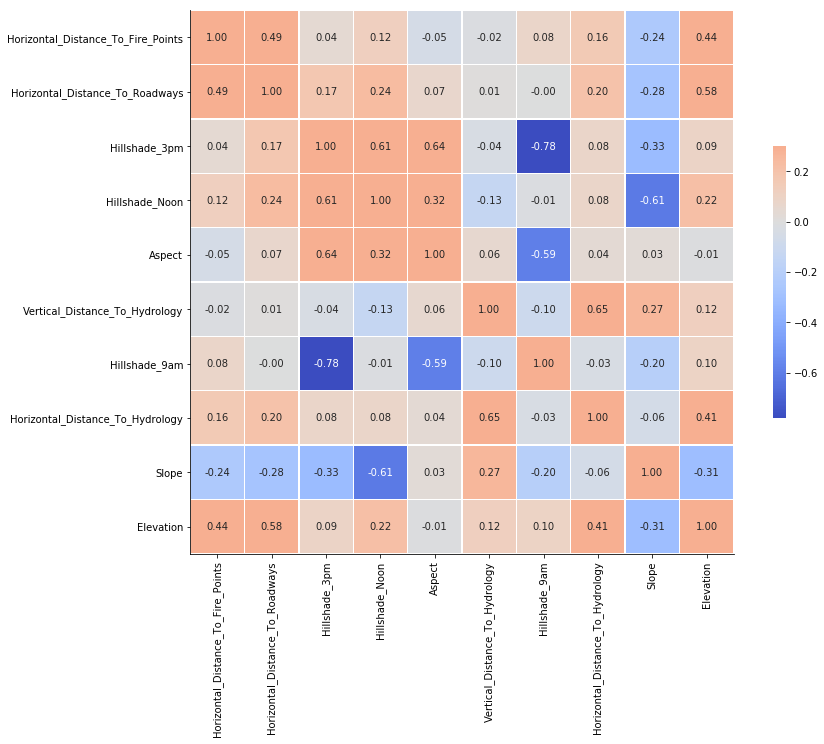

In [48]:
# For some sanity check
corr = scaled_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

## Test linear relations

In [49]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
X = scaled_df
y = train_df['Cover_Type']

In [50]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)
model.score(X, y)

0.6517857142857143

In [51]:
model = RidgeClassifier()
model.fit(X, y)
model.score(X, y)

0.49074074074074076

In [56]:
X_with_cat = pd.concat([X, train_df[[*wilderness_selected, *soil_selected]]], axis=1)
X_with_cat.shape

(15120, 18)

In [57]:
X_with_cat.head()

,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways,Hillshade_3pm,Hillshade_Noon,Aspect,Vertical_Distance_To_Hydrology,Hillshade_9am,Horizontal_Distance_To_Hydrology,Slope,Elevation,Wilderness_Area1,Wilderness_Area3,Soil_Type29,Soil_Type10,Soil_Type32,Soil_Type30,Soil_Type33,Soil_Type23
0,4.334805,-0.908681,0.281259,0.571653,-0.959980,-0.834074,0.271454,0.146639,-1.597132,-0.367095,1,0,1,0,0,0,0,0
1,4.285710,-0.999246,0.346627,0.703225,-0.914559,-0.932054,0.238732,-0.072337,-1.715424,-0.381461,1,0,1,0,0,0,0,0
2,4.191156,1.106379,-0.002005,0.834797,-0.160577,0.227369,0.696843,0.194243,-0.887379,0.130912,1,0,0,0,0,0,0,0
3,4.272981,1.038455,-0.285268,0.834797,-0.015231,1.092853,0.827731,0.070474,0.177250,0.085421,1,0,0,0,0,1,0,0
4,4.237524,-0.998491,0.324838,0.659368,-1.014485,-0.850404,0.238732,-0.353198,-1.715424,-0.369489,1,0,1,0,0,0,0,0


In [58]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_with_cat, y)
model.score(X_with_cat, y)

0.6906746031746032

In [59]:
model = LogisticRegression()
model.fit(X_with_cat, y)
model.score(X_with_cat, y)

0.6265873015873016

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_with_cat)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca.explained_variance_

array([2.89120157, 2.3412847 , 1.83486909, 1.089425  , 0.56843975,
       0.49061286])

In [62]:
pca.explained_variance_ratio_

array([0.26767571, 0.21676283, 0.16987743, 0.10086208, 0.05262778,
       0.04542234])

In [64]:
X_pca = pca.transform(X_with_cat)

In [65]:
model = LogisticRegression()
model.fit(X_pca[:14000, :], y[:14000])
print(model.score(X_pca[:14000, :], y[:14000]))
print(model.score(X_pca[14000:, :], y[14000:]))

0.48957142857142855
0.43839285714285714


In [66]:
# Finally, are other types of prediction models strong with numerical features??
model = DecisionTreeClassifier()
model.fit(X_pca[:14000, :], y[:14000])
print(model.score(X_pca[:14000, :], y[:14000]))
print(model.score(X_pca[14000:, :], y[14000:]))

1.0
0.5044642857142857


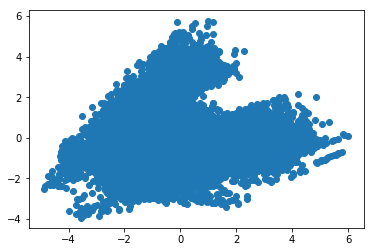

In [67]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

Text(0.5, 1.0, 'PCA of Forest Types dataset')

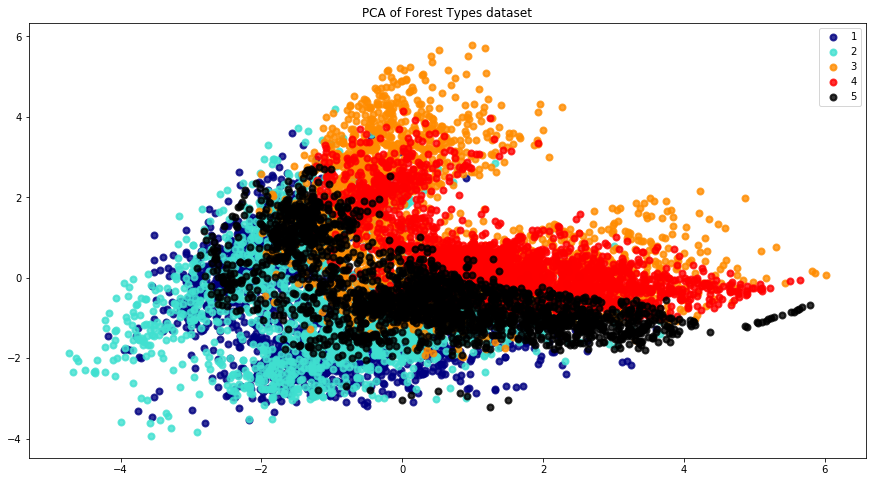

In [68]:
plt.figure(figsize=(15, 8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for i, color in zip(set(y), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Forest Types dataset')

### Linear relations are aparently very weak and some features have strong correlation, other are detached. Besides, the numerical features alone seem to be strong as predictors. Needs investigation.

# Brute Force

In [69]:
etc = ExtraTreesClassifier(n_estimators=1200,
                           max_features=0.5,
                          n_jobs=-1,
                          max_depth=10,
                          oob_score=True,
                          bootstrap=True)
etc.fit(X_train, y_train)
etc.oob_score_

0.7820767195767195

In [70]:
etc = ExtraTreesClassifier(n_estimators=1200,
                           max_features=0.5,
                          n_jobs=-1,
                          max_depth=10,
                          oob_score=True,
                          bootstrap=True)
etc.fit(X_train_reduced, y_train)
etc.oob_score_

0.7824074074074074

In [12]:
from time import time
from sklearn.model_selection import RandomizedSearchCV

X_e, y_e = train_df.drop(['Cover_Type'], axis=1), train_df['Cover_Type']

In [76]:
param_dist = {"max_depth": [5, 10, 15, 25, 40, 80],
              'max_features': [0.2, 0.4, 0.6, 0.8],
              'n_estimators': [20, 50, 100, 200, 600, 1200, 2000]
             }


def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
n_iter_search = 20
random_search = RandomizedSearchCV(ExtraTreesClassifier(bootstrap=False), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X_train_reduced, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 443.10 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.865 (std: 0.005)
Parameters: {'max_depth': 25, 'n_estimators': 2000, 'max_features': 0.6}

Model with rank: 2
Mean validation score: 0.864 (std: 0.006)
Parameters: {'max_depth': 25, 'n_estimators': 600, 'max_features': 0.8}

Model with rank: 3
Mean validation score: 0.863 (std: 0.006)
Parameters: {'max_depth': 30, 'n_estimators': 100, 'max_features': 0.8}



In [77]:
etc = ExtraTreesClassifier(
    bootstrap=True, oob_score=True,
    **{'max_depth': 25, 'n_estimators': 2000, 'max_features': 0.6}
    )
etc.fit(X_e, y_e)
etc.score(X_e, y_e)
etc.oob_score_

0.8783730158730159

In [74]:
etc = ExtraTreesClassifier(
    bootstrap=True, oob_score=True,
    **{'max_depth': 100, 'n_estimators': 2000, 'max_features': 1.0}
    )
etc.fit(X_e, y_e)
etc.score(X_e, y_e)
etc.oob_score_

0.8816798941798942

In [ ]:
## Train without outliers
from scipy.stats import zscore
zmask = (X_e.iloc[:,:10].apply(zscore).abs() < 3).all(1)
y_eo = y_e[zmask]
X_eo = X_e[zmask]

etc = ExtraTreesClassifier(
    bootstrap=True, oob_score=True,
    **{'max_depth': 32, 'n_estimators': 2200, 'max_features': 0.7}
    )
etc.fit(X_eo, y_eo)

In [22]:
print(etc.score(X_eo, y_eo))
print(etc.score(X_e, y_e))
print(etc.oob_score_)

1.0
0.9919312169312169
0.8850244926522043


In [80]:
etc.score(X_e, y_e)


0.9832010582010582

In [15]:
etc = ExtraTreesClassifier(
    bootstrap=True, oob_score=True,
    **{'max_depth': 32, 'n_estimators': 2200, 'max_features': 0.7}
    )
etc.fit(X_e, y_e)
etc.oob_score_

0.8866402116402117

In [16]:
# Train with all data, maximizing trees variety (bootstrap False)
etc = ExtraTreesClassifier(
    bootstrap=False,
    **{'max_depth': 32, 'n_estimators': 2200, 'max_features': 0.7}
    )
etc.fit(X_e, y_e)
etc.score(X_e, y_e)

1.0

## Predictions

In [23]:
test_pred = etc.predict(test_df)

In [24]:
# Save test predictions to file
output = pd.DataFrame({'ID': test_df["Id"],
                       'Cover_Type': test_pred})
output.to_csv('submission.csv', index=False)